**Diabetes Prediction using K-Nearest Neighbors (KNN) Classifier**

**Gathering the Dataset using Pandas**

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dr-riz/diabetes/master/diabetes.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


**Preprocessing**

In [2]:
df.columns = ['Pregnancy', 'Glucose','BP','skin_Thickness','Insulin','BMI','pedigree_function','Age','class']
df['class']=[1 if x=='tested_positive' else 0 for x in df['class']]
df.head(5)

,Pregnancy,Glucose,BP,skin_Thickness,Insulin,BMI,pedigree_function,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

<AxesSubplot:xlabel='class', ylabel='count'>

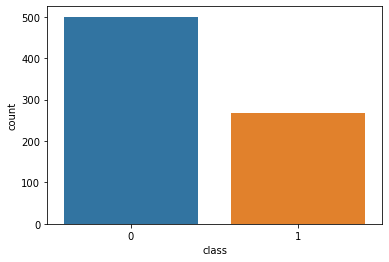

In [4]:
import seaborn as sns
sns.countplot( x = 'class', data = df )

In [5]:
#checking whether there are null values in the data
df.isnull().sum()

Pregnancy            0
Glucose              0
BP                   0
skin_Thickness       0
Insulin              0
BMI                  0
pedigree_function    0
Age                  0
class                0
dtype: int64

In [6]:
#finding the 0's count of entries for each column

for i in df.columns:
  print('no.of rows with value 0 for ' +str(i)+ ':', len(df.loc[df[i]==0]))

no.of rows with value 0 for Pregnancy: 111
no.of rows with value 0 for Glucose: 5
no.of rows with value 0 for BP: 35
no.of rows with value 0 for skin_Thickness: 227
no.of rows with value 0 for Insulin: 374
no.of rows with value 0 for BMI: 11
no.of rows with value 0 for pedigree_function: 0
no.of rows with value 0 for Age: 0
no.of rows with value 0 for class: 500


**Cleaning Data**

In [7]:
#non_zero_attributes cannot have their value as 0
non_zero_attributes= ['Glucose', 'BP', 'skin_Thickness', 'BMI', 'Insulin']
for i in non_zero_attributes:
  mean = int(df[i].mean(skipna=True))
  df[i] = df[i].replace(0, mean)
for i in df.columns:
  print('no.of rows with value 0 for ' +str(i)+ ':', len(df.loc[df[i]==0]))

no.of rows with value 0 for Pregnancy: 111
no.of rows with value 0 for Glucose: 0
no.of rows with value 0 for BP: 0
no.of rows with value 0 for skin_Thickness: 0
no.of rows with value 0 for Insulin: 0
no.of rows with value 0 for BMI: 0
no.of rows with value 0 for pedigree_function: 0
no.of rows with value 0 for Age: 0
no.of rows with value 0 for class: 500


<AxesSubplot:>

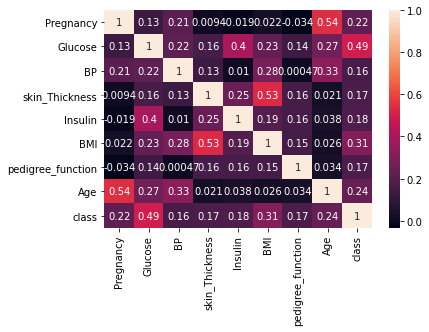

In [8]:
#finding correlations between attributes
co_relation_matrix= df.corr()
sns.heatmap(co_relation_matrix, annot=True)

Feature selection 

---
selecting independent & dependent attributes


In [9]:
x= df.drop(['class'],axis=1)
y= df['class']

Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Standardizing the data (scaling all values into the range of -1 and 1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Building KNN model**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, p=2, metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Predicting values against test_data

In [13]:
class_pred = knn.predict(x_test)
class_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

Measuring the Accuracy of data

Accuracy of the model: 0.8116883116883117


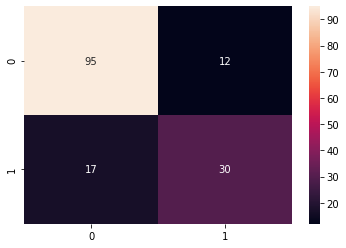

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, class_pred)
sns.heatmap(cm, annot=True)
print('Accuracy of the model:',accuracy_score(y_test, class_pred))

In [15]:
import pickle
filename = 'diabetes_knn.pkl'
pickle.dump(knn, open(filename, 'wb'))